In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

2023-09-27 15:24:03.746080: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 15:24:06.638683: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 15:24:06.639625: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-27 15:24:10.752640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Carga el archivo CSV
data = pd.read_csv('PARAMETROS_FINALES_CRUDOS.csv')

In [3]:
data.head()

,CLOROF_A,COLI_FEC,COLI_TOT,E_COLI,COT,COT_SOL,DBO_SOL,DBO_TOT,DQO_SOL,DQO_TOT,...,TURBIEDAD,TEMP_AMB,PROFUNDIDAD,CAUDAL,DUR_TOT,TEMP_AGUA,CONDUC_CAMPO,pH_CAMPO,OD_%,OD_mg/L
0,NaN,24196.0,24196.0,NaN,2.3560,2.3500,3.33,6.63,12.6,18.0872,...,46.0,35.3,NaN,430.0,303.3400,24.6,1200.0,8.20,83.7,5.26
1,NaN,24196.0,24196.0,24196.0,8.3441,6.4727,2.73,4.11,15.5,27.8784,...,60.0,26.7,NaN,420000.0,222.9984,24.3,677.0,7.97,85.8,7.21
2,NaN,24196.0,24196.0,3654.0,8.1953,6.1425,4.97,6.65,10.0,16.1600,...,30.0,34.6,NaN,180.0,224.4432,25.8,479.0,8.02,89.8,7.31
3,NaN,24196.0,24196.0,776.0,7.6502,4.0415,2.00,2.34,10.0,10.0000,...,40.0,NaN,NaN,5.0,414.9600,29.9,930.0,8.05,94.3,7.07
4,NaN,663.0,12997.0,109.0,9.4452,3.0909,2.00,2.33,10.0,25.4700,...,5.5,37.4,NaN,5.0,298.9900,33.1,1170.0,8.27,127.6,9.06


In [4]:
print(data.shape)

(6162, 34)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CLOROF_A       2749 non-null   float64
 1   COLI_FEC       6066 non-null   float64
 2   COLI_TOT       3138 non-null   float64
 3   E_COLI         3994 non-null   float64
 4   COT            6089 non-null   float64
 5   COT_SOL        6013 non-null   float64
 6   DBO_SOL        3931 non-null   float64
 7   DBO_TOT        4007 non-null   float64
 8   DQO_SOL        3915 non-null   float64
 9   DQO_TOT        3995 non-null   float64
 10  N_NH3          6147 non-null   float64
 11  N_NO2          6153 non-null   float64
 12  N_NO3          6141 non-null   float64
 13  N_ORG          6141 non-null   float64
 14  N_TOT          6111 non-null   float64
 15  N_TOTK         6130 non-null   float64
 16  P_TOT          6111 non-null   float64
 17  ORTO_PO4       6109 non-null   float64
 18  COLOR_VE

In [6]:
data.describe()

,CLOROF_A,COLI_FEC,COLI_TOT,E_COLI,COT,COT_SOL,DBO_SOL,DBO_TOT,DQO_SOL,DQO_TOT,...,TURBIEDAD,TEMP_AMB,PROFUNDIDAD,CAUDAL,DUR_TOT,TEMP_AGUA,CONDUC_CAMPO,pH_CAMPO,OD_%,OD_mg/L
count,2749.000000,6.066000e+03,3.138000e+03,3.994000e+03,6089.000000,6013.000000,3931.000000,4007.000000,3915.000000,3995.000000,...,6141.000000,6063.000000,2380.000000,3076.000000,3984.000000,5941.000000,6108.000000,6067.000000,5905.000000,5912.000000
mean,14.501710,6.838781e+04,1.557473e+05,8.396380e+04,5.331473,4.092796,4.835617,9.543517,19.964838,42.147475,...,31.046526,30.975155,7.003206,12806.168171,183.883866,28.596106,18832.347128,8.109654,94.245740,7.162119
std,36.562313,9.767650e+05,1.529181e+06,1.022876e+06,8.710750,6.285932,13.176105,27.447466,32.672916,74.957520,...,94.697087,4.004777,10.471952,45653.234151,220.226199,3.613518,27530.644162,0.464756,30.437776,2.308761
min,0.100000,1.000000e+00,1.000000e+00,1.000000e+00,0.066000,0.063200,2.000000,2.000000,10.000000,10.000000,...,0.200000,2.900000,0.000000,0.000000,22.650000,16.300000,26.300000,0.200000,10.000000,1.000000
25%,0.100000,2.990000e+02,4.884000e+03,1.775000e+01,0.826000,0.480000,2.000000,2.000000,10.000000,10.000000,...,3.100000,28.100000,0.840000,413.125000,76.750000,26.000000,231.000000,7.805000,80.100000,6.040000
50%,5.160000,1.722000e+03,1.413600e+04,1.065000e+02,3.347000,2.849100,2.000000,2.000000,10.000000,20.000000,...,7.400000,31.000000,1.970000,1663.500000,118.185000,29.100000,744.500000,8.100000,95.900000,7.300000
75%,14.480000,8.664000e+03,2.419600e+04,8.252500e+02,5.531000,4.601000,2.610000,5.100000,14.335000,38.445000,...,23.000000,34.000000,8.225000,7626.975000,210.496750,31.500000,47400.000000,8.400000,108.700000,8.400000
max,628.408000,2.419600e+07,2.419600e+07,2.419600e+07,148.748000,109.068000,315.950000,513.950000,562.800000,1849.200000,...,2300.000000,44.500000,40.000000,980000.000000,3622.996000,39.600000,148300.000000,10.000000,281.300000,21.660000


In [7]:
#seleccionar la columna numero 31 del dataset   
data.iloc[:,31]


0       8.20
1       7.97
2       8.02
3       8.05
4       8.27
        ... 
6157    8.50
6158    8.20
6159    8.10
6160    8.10
6161    9.20
Name: pH_CAMPO, Length: 6162, dtype: float64

In [8]:
# Elimina registros vacíos solo en la columna 31
data_cleaned = data.dropna(subset=[data.columns[31]])

In [9]:
print (data.shape)
print (data_cleaned.shape)

(6162, 34)
(6067, 34)


In [10]:
print(data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 6067 entries, 0 to 6161
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CLOROF_A       2662 non-null   float64
 1   COLI_FEC       5973 non-null   float64
 2   COLI_TOT       3136 non-null   float64
 3   E_COLI         3907 non-null   float64
 4   COT            5995 non-null   float64
 5   COT_SOL        5918 non-null   float64
 6   DBO_SOL        3843 non-null   float64
 7   DBO_TOT        3919 non-null   float64
 8   DQO_SOL        3827 non-null   float64
 9   DQO_TOT        3907 non-null   float64
 10  N_NH3          6052 non-null   float64
 11  N_NO2          6058 non-null   float64
 12  N_NO3          6046 non-null   float64
 13  N_ORG          6046 non-null   float64
 14  N_TOT          6016 non-null   float64
 15  N_TOTK         6035 non-null   float64
 16  P_TOT          6016 non-null   float64
 17  ORTO_PO4       6014 non-null   float64
 18  COLOR_VER    

In [11]:
# Calcular el umbral para el porcentaje de valores nulos
umbral = 0.05  # 50% de valores nulos

# Calcular el número mínimo de valores no nulos permitidos en una columna
min_non_nulls = len(data_cleaned) * (1 - umbral)

# Crear una lista de nombres de columnas que cumplan con el umbral de valores no nulos
columnas_a_mantener = [columna for columna in data_cleaned.columns if data_cleaned[columna].count() >= min_non_nulls]

#imprimir la lista de columnas a mantener
print(columnas_a_mantener)

# Crear un nuevo DataFrame con las columnas seleccionadas
data_filtrado = data_cleaned[columnas_a_mantener]

#imprimir el nuevo dataframe
print(data_filtrado.info())

['COLI_FEC', 'COT', 'COT_SOL', 'N_NH3', 'N_NO2', 'N_NO3', 'N_ORG', 'N_TOT', 'N_TOTK', 'P_TOT', 'ORTO_PO4', 'COLOR_VER', 'ABS_UV', 'SDT', 'SST', 'TURBIEDAD', 'TEMP_AMB', 'TEMP_AGUA', 'CONDUC_CAMPO', 'pH_CAMPO', 'OD_%', 'OD_mg/L']
<class 'pandas.core.frame.DataFrame'>
Index: 6067 entries, 0 to 6161
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COLI_FEC      5973 non-null   float64
 1   COT           5995 non-null   float64
 2   COT_SOL       5918 non-null   float64
 3   N_NH3         6052 non-null   float64
 4   N_NO2         6058 non-null   float64
 5   N_NO3         6046 non-null   float64
 6   N_ORG         6046 non-null   float64
 7   N_TOT         6016 non-null   float64
 8   N_TOTK        6035 non-null   float64
 9   P_TOT         6016 non-null   float64
 10  ORTO_PO4      6014 non-null   float64
 11  COLOR_VER     5979 non-null   float64
 12  ABS_UV        5881 non-null   float64
 13  SDT           5958 

In [12]:
# Elimina registros vacíos solo en la columna 31
data_final = data_filtrado.dropna()

In [13]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5206 entries, 0 to 6160
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COLI_FEC      5206 non-null   float64
 1   COT           5206 non-null   float64
 2   COT_SOL       5206 non-null   float64
 3   N_NH3         5206 non-null   float64
 4   N_NO2         5206 non-null   float64
 5   N_NO3         5206 non-null   float64
 6   N_ORG         5206 non-null   float64
 7   N_TOT         5206 non-null   float64
 8   N_TOTK        5206 non-null   float64
 9   P_TOT         5206 non-null   float64
 10  ORTO_PO4      5206 non-null   float64
 11  COLOR_VER     5206 non-null   float64
 12  ABS_UV        5206 non-null   float64
 13  SDT           5206 non-null   float64
 14  SST           5206 non-null   float64
 15  TURBIEDAD     5206 non-null   float64
 16  TEMP_AMB      5206 non-null   float64
 17  TEMP_AGUA     5206 non-null   float64
 18  CONDUC_CAMPO  5206 non-null   flo

In [14]:
#seleccionar la columna numero 31 del dataset   
data_final.iloc[:,19]

0       8.20
1       7.97
2       8.02
4       8.27
5       7.97
        ... 
6156    8.40
6157    8.50
6158    8.20
6159    8.10
6160    8.10
Name: pH_CAMPO, Length: 5206, dtype: float64

In [15]:
print(data_final.describe())

           COLI_FEC          COT      COT_SOL        N_NH3        N_NO2  \
count  5.206000e+03  5206.000000  5206.000000  5206.000000  5206.000000   
mean   7.627873e+04     4.780810     3.747862     1.084928     0.020812   
std    1.052488e+06     7.549563     5.475945     4.806745     0.091335   
min    1.000000e+00     0.066000     0.063200     0.003000     0.000626   
25%    3.280000e+02     0.746550     0.466000     0.056401     0.003038   
50%    1.726000e+03     3.210850     2.728850     0.098647     0.005818   
75%    8.164000e+03     5.142125     4.383325     0.196000     0.015000   
max    2.419600e+07   114.903000    62.922000    65.455460     3.697920   

             N_NO3        N_ORG        N_TOT       N_TOTK        P_TOT  ...  \
count  5206.000000  5206.000000  5206.000000  5206.000000  5206.000000  ...   
mean      0.512606     1.070029     2.688374     2.154957     0.342833  ...   
std       1.527277     1.708039     5.943553     5.774877     0.926733  ...   
min     

In [16]:
# Selecciona la columna objetivo (columna 31)
target_column = data_final.iloc[:, 19]


In [17]:
features = data_final.drop(columns=[data_final.columns[19]])

In [18]:
from sklearn.preprocessing import MinMaxScaler
# Normaliza los datos utilizando MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_objetive = scaler.fit_transform(target_column.values.reshape(-1,1))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_objetive, test_size=0.2, random_state=42)

#scaler = StandardScaler()
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


(4164, 21)
(1042, 21)
(4164, 1)
(1042, 1)


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


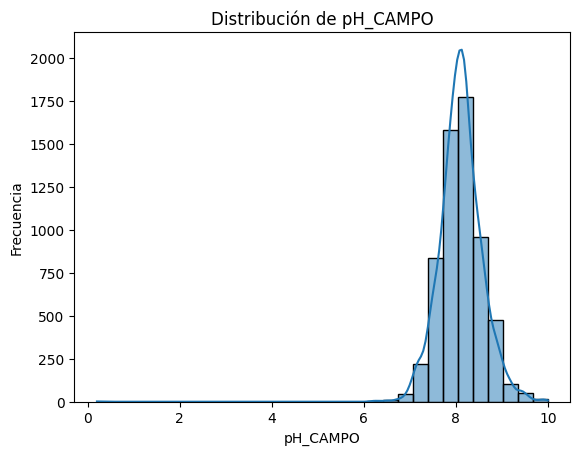

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar el histograma de la columna "CLOROF_A"
sns.histplot(data=data_filtrado, x='pH_CAMPO', bins=30, kde=True)
plt.xlabel('pH_CAMPO')
plt.ylabel('Frecuencia')
plt.title('Distribución de pH_CAMPO')
plt.show()


In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.losses import MeanAbsoluteError

#optimizer = Adagrad(learning_rate=0.01)
#optimizer = RMSprop(learning_rate=0.001)
#optimizer = SGD(learning_rate=0.01, momentum=0.9)

#loss = MeanAbsoluteError()
"""
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)  
])"""
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  
])
optimizer = Adam(learning_rate=0.001)
loss = MeanSquaredError()

model.compile(optimizer=optimizer, loss=loss, metrics=['mean_squared_error'])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2849 (11.13 KB)
Trainable params: 2849 (11.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train, epochs=101, batch_size=8, validation_split=0.2)


Epoch 1/101


417/417 [==============================] - 2s 1ms/step - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2/101
417/417 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 3/101
417/417 [==============================] - 0s 1ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 4/101
417/417 [==============================] - 1s 1ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 5/101
417/417 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 6/101
417/417 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 7/101
417/417 [=============

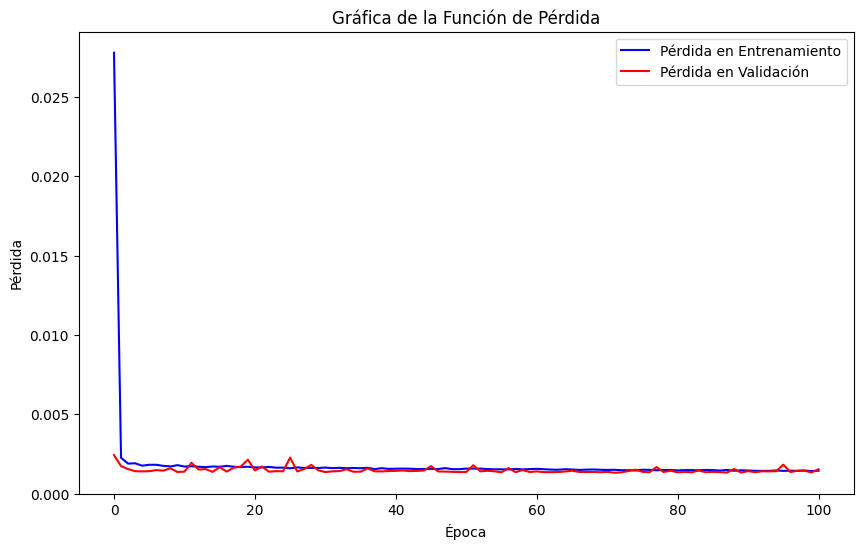

In [24]:
# Obtener las métricas de pérdida del historial
pérdida_entrenamiento = history.history['loss']
pérdida_validación = history.history['val_loss']

# Crear una gráfica de la función de pérdida
plt.figure(figsize=(10, 6))
plt.plot(pérdida_entrenamiento, label='Pérdida en Entrenamiento', color='blue')
plt.plot(pérdida_validación, label='Pérdida en Validación', color='red')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Gráfica de la Función de Pérdida')
plt.show()

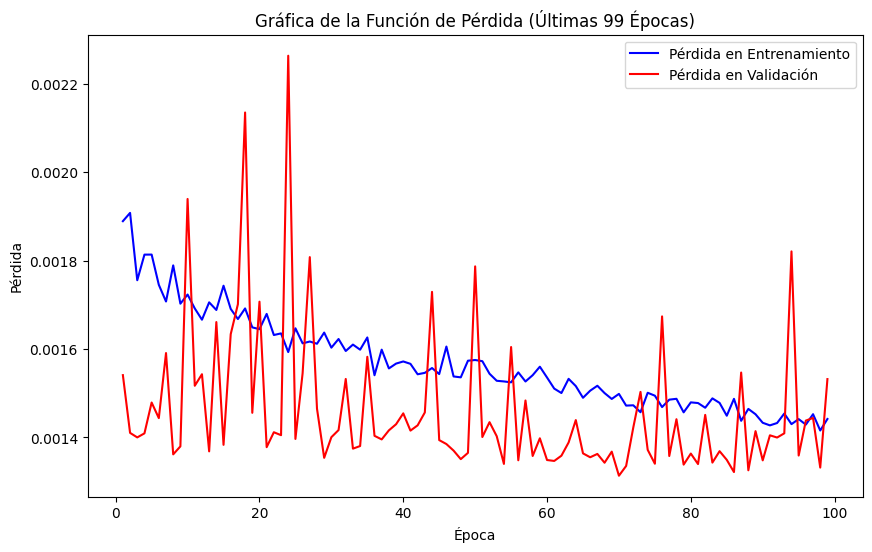

In [25]:
# Obtener las métricas de pérdida del historial
pérdida_entrenamiento = history.history['loss']
pérdida_validación = history.history['val_loss']

épocas = range(1, 100)

# Crear una gráfica de la función de pérdida para las últimas 99 épocas
plt.figure(figsize=(10, 6))
plt.plot(épocas, pérdida_entrenamiento[-99:], label='Pérdida en Entrenamiento', color='blue')
plt.plot(épocas, pérdida_validación[-99:], label='Pérdida en Validación', color='red')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Gráfica de la Función de Pérdida (Últimas 99 Épocas)')
plt.show()

In [26]:
loss = model.evaluate(X_test, y_test)
print("Pérdida en el conjunto de prueba:", loss)


33/33 [==============================] - 0s 774us/step - loss: 0.0016 - mean_squared_error: 0.0016  
Pérdida en el conjunto de prueba: [0.0015530152013525367, 0.0015530152013525367]


In [27]:
print(X_test.shape)

(1042, 21)


In [28]:
y_pred = model.predict(X_test)
print(y_pred.shape)

#mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

33/33 [==============================] - 0s 700us/step
(1042, 1)
MSE:  0.0015530144495883968


In [29]:
valor_estimado = model.predict(X_test[0].reshape(1, -1))
print ("Valor estimado:", valor_estimado)

1/1 [==============================] - 0s 12ms/step
Valor estimado: [[0.74502504]]


In [30]:
#muestra el valor real de la columna objetivo
print ("Valor real:", y_test[0])

Valor real: [0.69387755]


In [31]:
from sklearn.metrics import mean_squared_error

# Tomar 100 valores de X_test para hacer pruebas
num_valores_prueba = 50
valores_prueba = X_test[:num_valores_prueba]

# Estimar los valores correspondientes con el modelo
valores_estimados = model.predict(valores_prueba)

# Tomar los valores reales correspondientes a los primeros 100 datos de prueba
valores_reales = y_test[:num_valores_prueba]

for estimado, real in zip(valores_estimados, valores_reales):
    print(f"Valor estimado: {estimado}, Valor real: {real}")

# Calcular el MSE
mse = mean_squared_error(valores_reales, valores_estimados)

print("Error Cuadrático Medio (MSE) en los primeros " + str(num_valores_prueba) + " datos de prueba:", mse)

#calcular el rmse
rmse = np.sqrt(mse)
print("Raíz del Error Cuadrático Medio (RMSE) en los primeros " + str(num_valores_prueba) + " datos de prueba:", rmse)

2/2 [==============================] - 0s 2ms/step
Valor estimado: [0.74502504], Valor real: [0.69387755]
Valor estimado: [0.78363204], Valor real: [0.80612245]
Valor estimado: [0.8211789], Valor real: [0.75510204]
Valor estimado: [0.83749425], Valor real: [0.81632653]
Valor estimado: [0.8893453], Valor real: [0.87653061]
Valor estimado: [0.83021283], Valor real: [0.80612245]
Valor estimado: [0.7951231], Valor real: [0.78571429]
Valor estimado: [0.8307452], Valor real: [0.82040816]
Valor estimado: [0.8324518], Valor real: [0.86734694]
Valor estimado: [0.8406086], Valor real: [0.83673469]
Valor estimado: [0.8592669], Valor real: [0.87755102]
Valor estimado: [0.80259764], Valor real: [0.81734694]
Valor estimado: [0.80642784], Valor real: [0.77857143]
Valor estimado: [0.86134326], Valor real: [0.82653061]
Valor estimado: [0.8051188], Valor real: [0.78571429]
Valor estimado: [0.8253653], Valor real: [0.81632653]
Valor estimado: [0.77418995], Valor real: [0.78571429]
Valor estimado: [0.8688

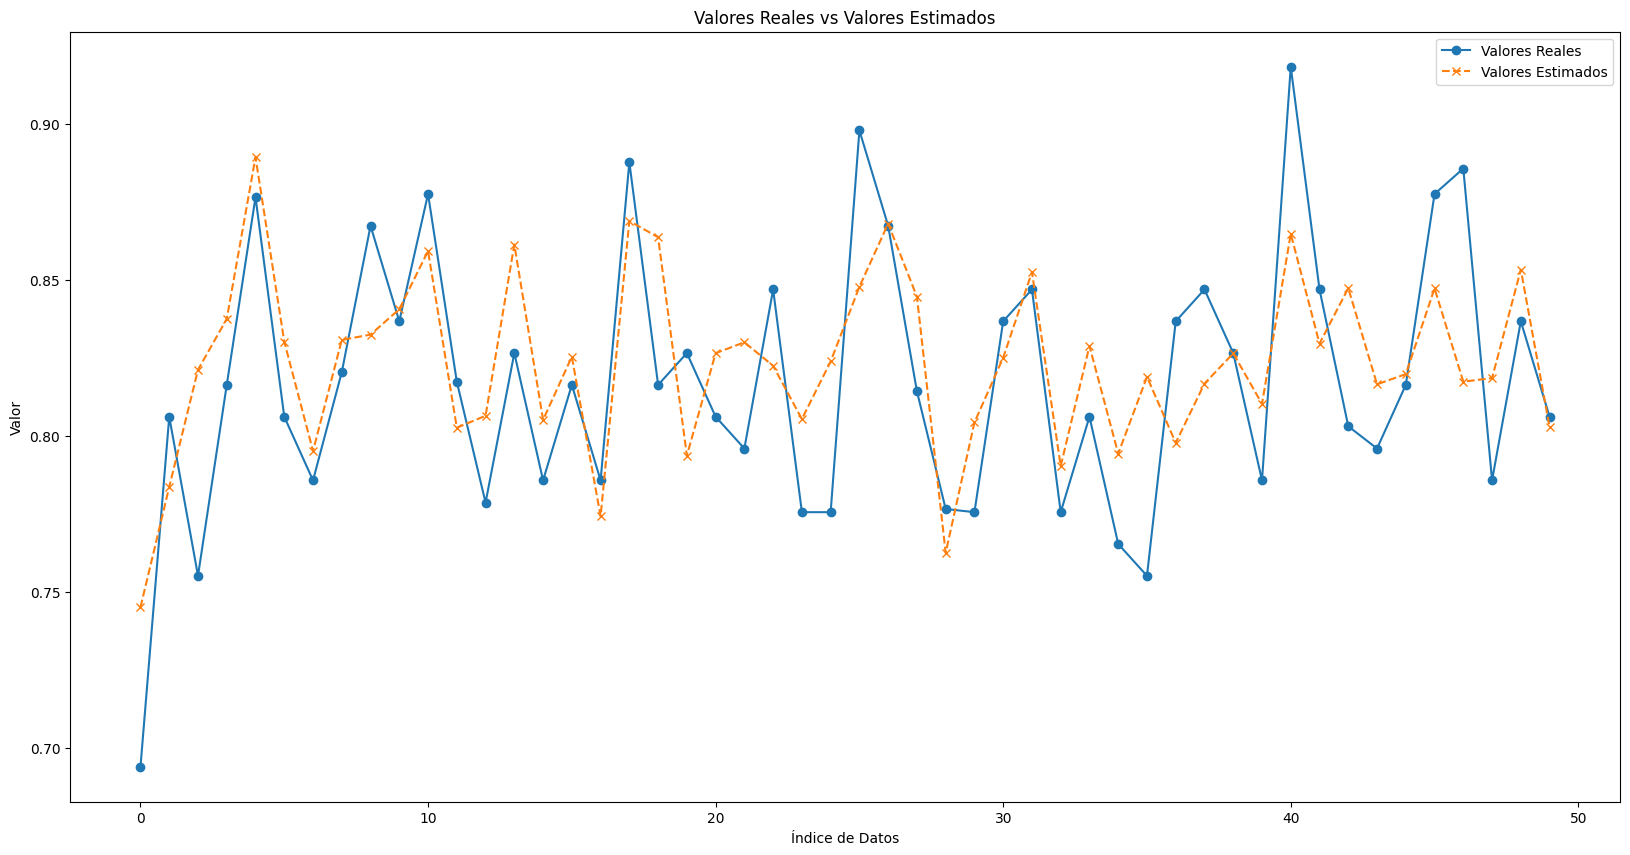

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(valores_reales, label='Valores Reales', marker='o', linestyle='-')
plt.plot(valores_estimados, label='Valores Estimados', marker='x', linestyle='--')

# Etiquetas y título
plt.xlabel('Índice de Datos')
plt.ylabel('Valor')
plt.title('Valores Reales vs Valores Estimados')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

# Prueba final


In [33]:
from deap import base, creator, tools, algorithms
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras

# Crear el objeto Fitness y el objeto Individuo
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))  # Maximizar la aptitud y minimizar la pérdida
creator.create("Individuo", list, fitness=creator.FitnessMulti)



In [34]:
# Definir los límites de los parámetros
parametros = {
    "activacion": ['relu', 'tanh', 'sigmoid'],
    "learning_rate": (0.0001, 0.1),
    "batch_size": (4, 64),
    "optimizacion": ["Adam", "RMSprop", "SGD"],
    "perdida": ["MSE", "MAE"],
    "neuronas_por_capa": (1, 64)
}

In [35]:
from keras.optimizers import Adam, RMSprop, SGD
from keras.initializers import glorot_uniform
# Función para cargar tus datos (reemplaza esto con tu propia carga de datos)
def cargar_datos():
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_objetive, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Función para generar un valor dentro de un rango
def generar_valor_uniforme(min_value, max_value):
    return random.uniform(min_value, max_value)

# Función para generar un individuo aleatorio
def generar_individuo():
    #print ("Generando individuo" + str(parametros))
    activation = random.choice(parametros["activacion"])
    learning_rate = generar_valor_uniforme(*parametros["learning_rate"])
    #batch_size = random.randint(*parametros["batch_size"])
    batch_size = random.randint(parametros["batch_size"][0], parametros["batch_size"][1])
    optimizacion = random.choice(parametros["optimizacion"])
    perdida = random.choice(parametros["perdida"])
    neuronas_por_capa = random.randint(*parametros["neuronas_por_capa"])

    return creator.Individuo([activation, learning_rate, batch_size, optimizacion, perdida, neuronas_por_capa])


# Función para construir y entrenar un modelo de red neuronal con los parámetros dados
def construir_modelo(activation, learning_rate, batch_size, optimizer,loss, neurons_per_layer):
    print ("Construyendo modelo") 
    print ("act=" + str(activation) + ", lr="+ str(learning_rate) + ", batch=" + str(batch_size)+ ", opt=" + str(optimizer)+ ", loss=" + str(loss)+ ", nuerons=" + str(neurons_per_layer))
    
    model = keras.Sequential()
    model.add(keras.layers.Dense(neurons_per_layer[0], activation=activation, input_shape=(X_train.shape[1],), kernel_initializer=glorot_uniform()))
    
    for neurons in neurons_per_layer[1:]:
        model.add(keras.layers.Dense(neurons, activation=activation))
        #model.add(keras.layers.Dense(neurons, activation='relu'))
    
    model.add(keras.layers.Dense(1))  # Salida única para regresión
    
    #optimizerFinal = optimizer(learning_rate=learning_rate)  # Utiliza la función de optimización dada
    optimizerFinal = None  # Inicialización predeterminada
    if optimizer == 'Adam':
        optimizerFinal = Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        optimizerFinal = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
        optimizerFinal = SGD(learning_rate=learning_rate)    
        
    # Compila el modelo con el optimizador, la función de pérdida y la métrica
    model.compile(optimizer=optimizerFinal, loss=loss, metrics=['mae'])
    
    # Entrena el modelo
    model.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=0)
    
    return model


# Función para evaluar un individuo
def evaluar_individuo(individual):
    
    #print ("Evaluando individuo:", individual)
    print ("Activacion: "+str(individual[0]))
    print ("Learning Rate: "+str(individual[1]))
    print ("Batch Size: "+str(individual[2]))
    print ("Optimizacion: "+str(individual[3]))
    print ("Perdida: "+str(individual[4]))
    print ("Neuronas por capa: "+str(individual[5]) + "\n")
    

    activation = individual[0]  # Función de activación
    learning_rate = individual[1]  # Tasa de aprendizaje
    batch_size = individual[2]  # Tamaño del lote
    optimizer = individual[3]  # Función de optimización
    loss = individual[4]  # Función de pérdida
    neurons_per_layer = [individual[5]] * 3  # Número de neuronas en cada capa (en este caso, 3 capas)
    
    
    #Construye y entrena el modelo con los parámetros dados
    model = construir_modelo(activation, learning_rate, batch_size, optimizer, loss, neurons_per_layer)

    #Realiza predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    #Calcula el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, y_pred)

    print ("MSE: " + str(mse) + "\n")

    #Devuelve el MSE como aptitud (fitness) y el MAE (Error Absoluto Medio) como información adicional
    return mse, np.mean(np.abs(y_test - y_pred))


def es_individuo_valido(individual):
    opciones = {
        "activacion": ['relu', 'tanh', 'sigmoid'],
        "learning_rate": (0.0001, 0.1),
        "batch_size": (4, 64),
        "optimizacion": ["Adam", "RMSprop", "SGD"],
        "perdida": ["MSE", "MAE"],
        "neuronas_por_capa": (1, 64)
    }

    # Verificar restricciones para la función de activación
    if individual[0] not in opciones["activacion"]:
        return False

    # Verificar restricciones para la tasa de aprendizaje
    learning_rate = individual[1]
    if not (opciones["learning_rate"][0] <= learning_rate <= opciones["learning_rate"][1]):
        return False

    # Verificar restricciones para el tamaño del lote
    batch_size = individual[2]
    if not (opciones["batch_size"][0] <= batch_size <= opciones["batch_size"][1]):
        return False

    # Verificar restricciones para la función de optimización
    if individual[3] not in opciones["optimizacion"]:
        return False

    # Verificar restricciones para la función de pérdida
    if individual[4] not in opciones["perdida"]:
        return False

    # Verificar restricciones para el número de neuronas por capa
    neurons_per_layer = individual[5]
    if not (opciones["neuronas_por_capa"][0] <= neurons_per_layer <= opciones["neuronas_por_capa"][1]):
        return False

    # Si todas las restricciones se cumplen, el individuo se considera válido
    return True

def mutar_individual(individual):
    mutated_individual = list(individual)  # Convierte el individuo en una lista mutable
    # Realiza la mutación en uno de los genes (por ejemplo, el primer gen)
    mutated_individual[0] = random.choice(parametros["activacion"])
    return tuple(mutated_individual)  # Convierte la lista de nuevo en una tupla


In [36]:
from deap import base, tools
"""
# Define una función de mutación que maneje ambos tipos de valores
def mutacion_mixta(individual, low, up, indpb):
    for i, (gen, xl, xu) in enumerate(zip(individual, low, up)):
        if random.random() < indpb:
            if isinstance(gen, int):
                individual[i] = random.randint(xl, xu)
            elif isinstance(gen, float):
                individual[i] = random.uniform(xl, xu)

def mutacion_mixta(individual, low, up, indpb):
    # Realiza la mutación dentro de un bucle hasta que se obtenga un individuo válido
    while True:
        mutated_individual = individual.copy()  # Copia el individuo original
        for i, (gen, xl, xu) in enumerate(zip(mutated_individual, low, up)):
            if random.random() < indpb:
                if isinstance(gen, int):
                    mutated_individual[i] = random.randint(xl, xu)
                elif isinstance(gen, float):
                    mutated_individual[i] = random.uniform(xl, xu)
        # Comprueba si el individuo mutado es válido (implementa tu propia lógica de validación aquí)
        if es_individuo_valido(mutated_individual):
            return mutated_individual
"""
# Define los rangos permitidos para cada gen
low = [0, 0.0001, 4, 0, 0, 1]
up = [2, 0.1, 64, 2, 1, 64]

"""parametros = {
    "activacion": ['relu', 'tanh', 'sigmoid'],
    "learning_rate": (0.0001, 0.1),
    "batch_size": (4, 64),
    "optimizacion": ["Adam", "RMSprop", "SGD"],
    "perdida": ["MSE", "MAE"],
    "neuronas_por_capa": (1, 64)
}"""

def mutacion_customizada(individual, low, up, indpb):
    for i in range(len(individual)):
        if random.random() < indpb:
            if i == 0:  # Mutación para el primer gen
                individual[i] = random.randint(low[i], up[i])  # Mutación entera
                if individual[i] == 0:
                    individual[i] = 'relu'
                elif individual[i] == 1:
                    individual[i] = 'tanh'
                elif individual[i] == 2:
                    individual[i] = 'sigmoid'
            elif i == 1:  # Mutación para el segundo gen
                individual[i] = random.uniform(low[i], up[i])  # Mutación uniforme (float)
            elif i == 2:  # Mutación para el tercer gen
                individual[i] = random.randint(low[i], up[i])  # Mutación entera
            elif i == 3:  # Mutación para el cuarto gen
                individual[i] = random.randint(low[i], up[i])  # Mutación entera
                if individual[i] == 0:
                    individual[i] = 'Adam'
                elif individual[i] == 1:
                    individual[i] = 'RMSprop'
                elif individual[i] == 2:
                    individual[i] = 'SGD'
            elif i == 4:  # Mutación para el quinto gen
                individual[i] = random.randint(low[i], up[i])  # Mutación entera
                if individual[i] == 0:
                    individual[i] = 'MSE'
                elif individual[i] == 1:
                    individual[i] = 'MAE'
            elif i == 5:  # Mutación para el sexto gen
                individual[i] = random.randint(low[i], up[i])  # Mutación entera
    return individual,

In [37]:
# Cargar tus datos
X_train, X_test, y_train, y_test = cargar_datos()

# Configuración de DEAP
toolbox = base.Toolbox()
toolbox.register("individual", generar_individuo)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluar_individuo)
toolbox.register("mate", tools.cxTwoPoint)
#toolbox.register("mutate", tools. , low=[1, 0.0001, 4, 0, 0, 1], up=[3, 0.1, 64, 2, 1, 64], indpb=0.2)
#toolbox.register("mutate", mutacion_mixta, low=low, up=up, indpb=0.2)
#toolbox.register("mutate", mutar_individual)
toolbox.register("mutate", mutacion_customizada,low=low,up=up, indpb=0.2) 

toolbox.register("select", tools.selTournament, tournsize=3)

#print("primer individuo" + str(generar_individuo()))
#print("toolbox"+str(toolbox))
# Parámetros del algoritmo genético
population_size = 10
num_generations = 10
crossover_prob = 0.7
mutation_prob = 0.7

# Crear una población inicial
population = toolbox.population(n=population_size)

# Ejecutar el algoritmo genético
population, logbook = algorithms.eaSimple(
    population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob, ngen=num_generations, verbose=True
)

# Mostrar el mejor individuo y su aptitud
best_individual = tools.selBest(population, k=1)[0]
print("Mejor Individuo:", best_individual)
print("Aptitud:", best_individual.fitness.values)
print("MAE:", best_individual.fitness.values[1])
print("MSE:", best_individual.fitness.values[0])


Activacion: tanh
Learning Rate: 0.00643939081305873
Batch Size: 12
Optimizacion: RMSprop
Perdida: MSE
Neuronas por capa: 59

Construyendo modelo
act=tanh, lr=0.00643939081305873, batch=12, opt=RMSprop, loss=MSE, nuerons=[59, 59, 59]


33/33 [==============================] - 0s 686us/step
MSE: 0.00145455452817995

Activacion: tanh
Learning Rate: 0.07963923620361152
Batch Size: 39
Optimizacion: Adam
Perdida: MAE
Neuronas por capa: 23

Construyendo modelo
act=tanh, lr=0.07963923620361152, batch=39, opt=Adam, loss=MAE, nuerons=[23, 23, 23]
33/33 [==============================] - 0s 736us/step
MSE: 0.029506348766535923

Activacion: tanh
Learning Rate: 0.03218708818923313
Batch Size: 55
Optimizacion: SGD
Perdida: MAE
Neuronas por capa: 50

Construyendo modelo
act=tanh, lr=0.03218708818923313, batch=55, opt=SGD, loss=MAE, nuerons=[50, 50, 50]
33/33 [==============================] - 0s 715us/step
MSE: 0.001669289984698865

Activacion: relu
Learning Rate: 0.09522015701159726
Batch Size: 36
Optimizacion: Adam
Perdida: MAE
Neuronas por capa: 34

Construyendo modelo
act=relu, lr=0.09522015701159726, batch=36, opt=Adam, loss=MAE, nuerons=[34, 34, 34]
33/33 [==============================] - 0s 693us/step
MSE: 0.00298167012609

In [38]:
#crear modelo con el mejor individuo
activation = best_individual[0]  # Función de activación
learning_rate = best_individual[1]  # Tasa de aprendizaje
batch_size = best_individual[2]  # Tamaño del lote
optimizer = best_individual[3]  # Función de optimización
loss = best_individual[4]  # Función de pérdida
neurons_per_layer = [best_individual[5]] * 3  # Número de neuronas en cada capa (en este caso, 3 capas)

print ("Activacion: "+str(activation))
print ("Learning Rate: "+str(learning_rate))
print ("Batch Size: "+str(batch_size))
print ("Optimizacion: "+str(optimizer))
print ("Perdida: "+str(loss))
print ("Neuronas por capa: "+str(neurons_per_layer) + "\n")

#Construye y entrena el modelo con los parámetros dados
model = construir_modelo(activation, learning_rate, batch_size, optimizer, loss, neurons_per_layer)

#Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

print(model.summary())
#Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

print ("y_pred: " + str(y_pred) )
print ("y_test: " + str(y_test) + "\n")

print ("MSE: " + str(mse) + "\n")


Activacion: sigmoid
Learning Rate: 0.008983879434707243
Batch Size: 28
Optimizacion: Adam
Perdida: MSE
Neuronas por capa: [8, 8, 8]

Construyendo modelo
act=sigmoid, lr=0.008983879434707243, batch=28, opt=Adam, loss=MSE, nuerons=[8, 8, 8]


33/33 [==============================] - 0s 664us/step
Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_388 (Dense)           (None, 8)                 176       
                                                                 
 dense_389 (Dense)           (None, 8)                 72        
                                                                 
 dense_390 (Dense)           (None, 8)                 72        
                                                                 
 dense_391 (Dense)           (None, 1)                 9         
                                                                 
Total params: 329 (1.29 KB)
Trainable params: 329 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
y_pred: [[0.74638975]
 [0.7652363 ]
 [0.82776505]
 ...
 [0.82284254]
 [0.82781976]
 [0.8461543 

In [39]:
print("Mejor Individuo:", best_individual)
print("Aptitud:", best_individual.fitness.values)
print("MAE:", best_individual.fitness.values[1])
print("MSE:", best_individual.fitness.values[0])

print(y_test.shape)
print(y_pred.shape)

Mejor Individuo: ['sigmoid', 0.008983879434707243, 28, 'Adam', 'MSE', 8]
Aptitud: (0.0014342040077819096, 0.02856574420594802)
MAE: 0.02856574420594802
MSE: 0.0014342040077819096
(1042, 1)
(1042, 1)


In [40]:

# Tomar 100 valores de X_test para hacer pruebas
num_valores_prueba = 50
valores_prueba = X_test[:num_valores_prueba]

# Estimar los valores correspondientes con el modelo
valores_estimados = model.predict(valores_prueba)

# Tomar los valores reales correspondientes a los primeros 100 datos de prueba
valores_reales = y_test[:num_valores_prueba]

for estimado, real in zip(valores_estimados, valores_reales):
    print(f"Valor estimado: {estimado}, Valor real: {real}")

# Calcular el MSE
mse = mean_squared_error(valores_reales, valores_estimados)

print("Error Cuadrático Medio (MSE) en los primeros " + str(num_valores_prueba) + " datos de prueba:", mse)

#calcular el rmse
rmse = np.sqrt(mse)
print("Raíz del Error Cuadrático Medio (RMSE) en los primeros " + str(num_valores_prueba) + " datos de prueba:", rmse)

2/2 [==============================] - 0s 2ms/step
Valor estimado: [0.74638975], Valor real: [0.69387755]
Valor estimado: [0.7652363], Valor real: [0.80612245]
Valor estimado: [0.82776505], Valor real: [0.75510204]
Valor estimado: [0.8203597], Valor real: [0.81632653]
Valor estimado: [0.8616545], Valor real: [0.87653061]
Valor estimado: [0.8287585], Valor real: [0.80612245]
Valor estimado: [0.7956074], Valor real: [0.78571429]
Valor estimado: [0.816247], Valor real: [0.82040816]
Valor estimado: [0.8145642], Valor real: [0.86734694]
Valor estimado: [0.83085215], Valor real: [0.83673469]
Valor estimado: [0.8269615], Valor real: [0.87755102]
Valor estimado: [0.80326635], Valor real: [0.81734694]
Valor estimado: [0.81192034], Valor real: [0.77857143]
Valor estimado: [0.83270574], Valor real: [0.82653061]
Valor estimado: [0.8052042], Valor real: [0.78571429]
Valor estimado: [0.8202094], Valor real: [0.81632653]
Valor estimado: [0.78516126], Valor real: [0.78571429]
Valor estimado: [0.831404

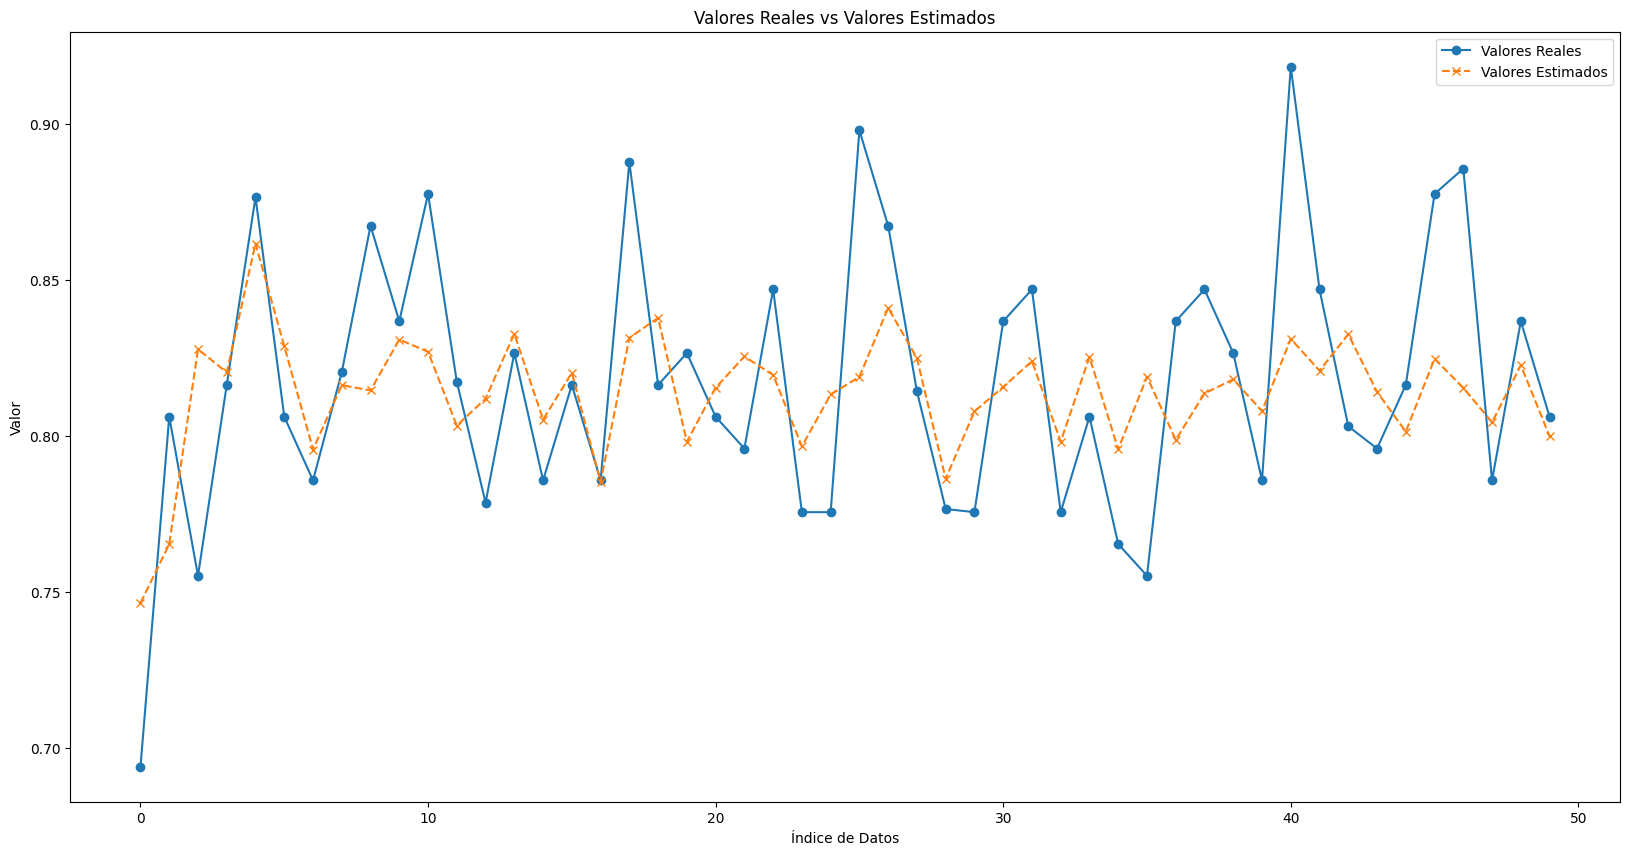

In [41]:
plt.figure(figsize=(20, 10))
plt.plot(valores_reales, label='Valores Reales', marker='o', linestyle='-')
plt.plot(valores_estimados, label='Valores Estimados', marker='x', linestyle='--')

# Etiquetas y título
plt.xlabel('Índice de Datos')
plt.ylabel('Valor')
plt.title('Valores Reales vs Valores Estimados')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()